### Classfication

+ Today we'll be working with the Iris dataset
+ First we'll explore
+ Then we'll build a terrible classifer
+ Then we'll build a KNN classifer!

In [61]:
import os
import numpy as np
from sklearn import datasets, neighbors, metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns

%matplotlib inline

iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

irisdf.head()
df = irisdf.copy()

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df["target"].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

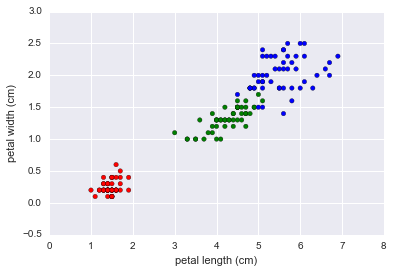

In [7]:
#print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)

cmap = {'0': 'r', '1': 'g', '2': 'b' }

irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])

irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)

### Let's make a dumb classifier

+ This is not a good classifier
+ It's to illustrate the idea of classifiers
+ When will we make a good one? Later, I promise

+ For now, let's investigate using the quantile function

In [8]:
print(irisdf['petal length (cm)'].quantile(1.00))
print(irisdf['petal length (cm)'].max())
print(irisdf['petal length (cm)'].quantile(0.66))
print(irisdf['petal length (cm)'].quantile(0.33))

6.9
6.9
4.8340000000000005
2.0870000000000015


In [9]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1
    
predictions = irisdf.apply(my_classifier, axis=1)

## So, how did we do?

In [11]:
irisdf['predictions'] = predictions

print(float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf))

0.6666666666666666


#### Chop up petal length in to quartiles

In [13]:
Q3 = df["petal length (cm)"].quantile(.75)
Q2 = df["petal length (cm)"].quantile(.5)
Q1 = df["petal length (cm)"].quantile(.25)

In [31]:
print(Q1,Q2,Q3)

1.6 4.35 5.1


In [35]:
len(chop)

150

In [18]:
len(df)

150

In [36]:
chop = []
for x in df["petal length (cm)"]:
    if x <= Q1:
        chop.append("Q1")
    if x > Q1 and x <= Q2:
        chop.append("Q2")
    if x > Q2 and x <= Q3:
        chop.append("Q3")
    if x > Q3:
         chop.append("Q4")
    else:
        pass

df["Quartile"] = chop

### In Class Exercise 

+ Work on improving the classifier below.

+ Could we add another cutoff to fix our mediocre classifier? 

+ What is missing below? 

In [ ]:
# We skipped this in class
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

### Using distance: KNN implementation

In [39]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()

# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)

print(knn.score(iris.data[:,2:], iris.target))

0.96


### But what does this score look like? 

+ Lets print out the raw outcome var vs predicted outcome

In [48]:
predicted = knn.predict(iris.data[:,2:])
observed = iris.target

results = pd.DataFrame(data = [predicted, observed]).T
results.columns = ["Predicted", "Observed"]
results["Diff"] = results["Predicted"] - results["Observed"]
results[results ["Diff"] != 0]

,Predicted,Observed,Diff
70,2,1,1
77,2,1,1
83,2,1,1
106,1,2,-1
119,1,2,-1
133,1,2,-1


## Do we see a change in performance when using the distance weight?

In [50]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(iris.data[:,2:], iris.target)
#print knn.predict(iris.data[:,2:])
#print iris.target

print(knn.score(iris.data[:,2:], iris.target))

0.993333333333


In [51]:
predicted = knn.predict(iris.data[:,2:])
observed = iris.target

results = pd.DataFrame(data = [predicted, observed]).T
results.columns = ["Predicted", "Observed"]
results["Diff"] = results["Predicted"] - results["Observed"]
results[results ["Diff"] != 0]

,Predicted,Observed,Diff
70,2,1,1


In [57]:
metrics.confusion_matrix(iris["target"], knn.predict(iris.data[:,2:]))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [106]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt



k = np.arange(5,101,1)# some *list of numbers*! Make this go to 100!
params = {"n_neighbors": k, 
         "weights": ["uniform", "distance"], 
         "metric": ["minkowski", "manhattan", "euclidean", "chebyshev"]}
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
            # Specify the parameter you're changing as a dictionary key
            # Specify the *list of numbers* as the dictionary value!

kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=150, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev'], 'n_neighbors': array([  5,   6, ...,  99, 100])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [107]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

In [96]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7, weights='distance')
algoKNN = knn.fit(iris.data[:,:2], iris.target)
print("R Squared: ", knn.score(iris.data[:,:2], iris.target))
print("---------------------------")
print("Confusion Matrix")
print(metrics.confusion_matrix(algoKNN.predict(iris.data[:,:2]), iris.target))

R Squared:  0.926666666667
---------------------------
Confusion Matrix
[[50  0  0]
 [ 0 49 10]
 [ 0  1 40]]


In [70]:
neighbors.KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'metric', 'n_jobs', 'n_neighbors', 'p', 'leaf_size', 'weights', 'metric_params'])

In [69]:
neighbors.KNeighborsClassifier().get_params().values()

dict_values(['auto', 'minkowski', 1, 5, 2, 30, 'uniform', None])

## Not lets plot that, because it's not easy to just look at grid scores

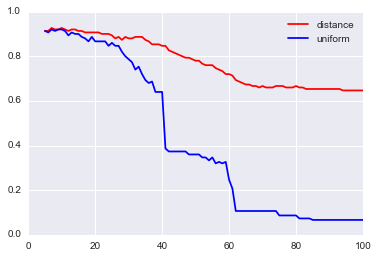

In [97]:
# As K continues to grow the score gets worse 
line_up, = plt.plot(k,[s[1] for s in  gs.grid_scores_[1::2]], color='red', label='distance')
line_down, = plt.plot(k,[s[1] for s in  gs.grid_scores_[::2]], color='blue', label = 'uniform')
plt.legend(handles=[line_up, line_down])

### Remember these functions!
+ How do they match up with the graphs above?


In [99]:
print(gs.best_score_)

0.9266666666666666


In [ ]:
print gs.best_params_


In [ ]:
print gs.best_estimator_